In [1]:
import os 
import random 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image 
import torchvision

In [2]:
TRAIN_PATH = "/home/anukul/Thesis_Data/Steel_Scrap_detection/train"
VAL_PATH = "/home/anukul/Thesis_Data/Steel_Scrap_detection/valid"
TEST_PATH = "/home/anukul/Thesis_Data/Steel_Scrap_detection/test"

TRAIN_LABELS = TRAIN_PATH + "/labels"
VAL_LABELS = VAL_PATH + "/labels"
TEST_LABELS = TEST_PATH + "/labels"

TRAIN_IMAGES = TRAIN_PATH + "/images"
VAL_IMAGES = VAL_PATH + "/images"
TEST_IMAGES = TEST_PATH + "/images"


classes = ['Capacitor', 'Cylinder', 'Motor', 'Shock absorber', 'container']
Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}
print("Index to Label Mapping:", Idx2Label)
print("Label to Index Mapping:", Label2Index)

Index to Label Mapping: {0: 'Capacitor', 1: 'Cylinder', 2: 'Motor', 3: 'Shock absorber', 4: 'container'}
Label to Index Mapping: {'Capacitor': 0, 'Cylinder': 1, 'Motor': 2, 'Shock absorber': 3, 'container': 4}


In [3]:
def visualize_image_with_annotation_polygons_advanced(image_dir, label_dir, 
                                                    fill_polygons=True, 
                                                    show_vertices=True,
                                                    colors=None):
    """
    Advanced polygon visualization with more options
    
    Args:
        image_dir: Directory containing images
        label_dir: Directory containing label files
        fill_polygons: Whether to fill polygons with semi-transparent color
        show_vertices: Whether to show vertex points
        colors: List of colors for different classes (BGR format)
    """
    if colors is None:
        # Default colors for different classes
        colors = [
            (0, 255, 0),    # Green
            (255, 0, 0),    # Blue  
            (0, 0, 255),    # Red
            (255, 255, 0),  # Cyan
            (255, 0, 255),  # Magenta
            (0, 255, 255),  # Yellow
        ]
    
    image_files = sorted(os.listdir(image_dir))
    # sample_image_files = random.sample(image_files, 8)

    sample_image_files = image_files[:8]

    print(sample_image_files)
    
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    
    for i, image_file in enumerate(sample_image_files):
        row = i // 2
        col = i % 2
        
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape
        
        label_path = os.path.join(label_dir, image_file[:-4] + ".txt")
        
        if not os.path.exists(label_path):
            axs[row, col].imshow(image)
            axs[row, col].axis("off")
            axs[row, col].set_title(f"{image_file} (No labels)")
            continue
            
        with open(label_path, "r") as f:
            for label in f:
                parts = list(map(float, label.strip().split()))
                
                if len(parts) < 3:
                    continue
                    
                class_id = int(parts[0])
                coordinates = parts[1:]
                
                if len(coordinates) % 2 != 0:
                    continue
                
                # Convert to pixel coordinates
                points = []
                for j in range(0, len(coordinates), 2):
                    x_pixel = int(coordinates[j] * w)
                    y_pixel = int(coordinates[j + 1] * h)
                    points.append([x_pixel, y_pixel])
                
                points = np.array(points, dtype=np.int32)
                
                if len(points) >= 3:
                    # Get color for this class
                    color = colors[class_id % len(colors)]
                    
                    # Fill polygon if requested
                    if fill_polygons:
                        overlay = image.copy()
                        cv2.fillPoly(overlay, [points], color)
                        cv2.addWeighted(overlay, 0.25, image, 0.75, 0, image)
                    
                    # Draw polygon outline
                    cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
                    
                    # Show vertices if requested
                    if show_vertices:
                        for point in points:
                            cv2.circle(image, tuple(point), 4, color, -1)
                            cv2.circle(image, tuple(point), 4, (255, 255, 255), 1)
                    
                    # Add class label
                    label_pos = (points[0][0], max(points[0][1] - 10, 15))
                    cv2.putText(
                        image,
                        f"Class {class_id}",
                        label_pos,
                        cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=0.7,
                        color=(255, 255, 255),
                        thickness=2,
                    )
                    cv2.putText(
                        image,
                        f"Class {class_id}",
                        label_pos,
                        cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=0.7,
                        color=color,
                        thickness=1,
                    )
        
        axs[row, col].imshow(image)
        axs[row, col].axis("off")
        axs[row, col].set_title(f"{image_file}")
    
    plt.tight_layout()
    plt.show()

['1000_F_382027588_fcip4m3qcknKa2bVJVoWfWPZQECz3MuY_jpg.rf.30b3193f536e297dd0a83710ce0f6e28.jpg', '1000_F_382027588_fcip4m3qcknKa2bVJVoWfWPZQECz3MuY_jpg.rf.9f359c6a1b7545d1f23cc9e4e8dd8ccb.jpg', '1000_F_382027588_fcip4m3qcknKa2bVJVoWfWPZQECz3MuY_jpg.rf.f26bcb38efae4ffbaa3f936abd1bcc49.jpg', '1583400514_jpg.rf.a7490a7d29119d706cc5304a3e843996.jpg', '1583400514_jpg.rf.c2ef61006aea50a4c98cc9f7091da9d2.jpg', '1583400514_jpg.rf.d8e3df7960529cc6afdfdcb4cc966787.jpg', '20200424022814_90414_jpg.rf.277e96e8a601fc2ef24c797b27a94658.jpg', '20200424022814_90414_jpg.rf.93136e26d1b2478ed9bca73dffbf18c3.jpg']


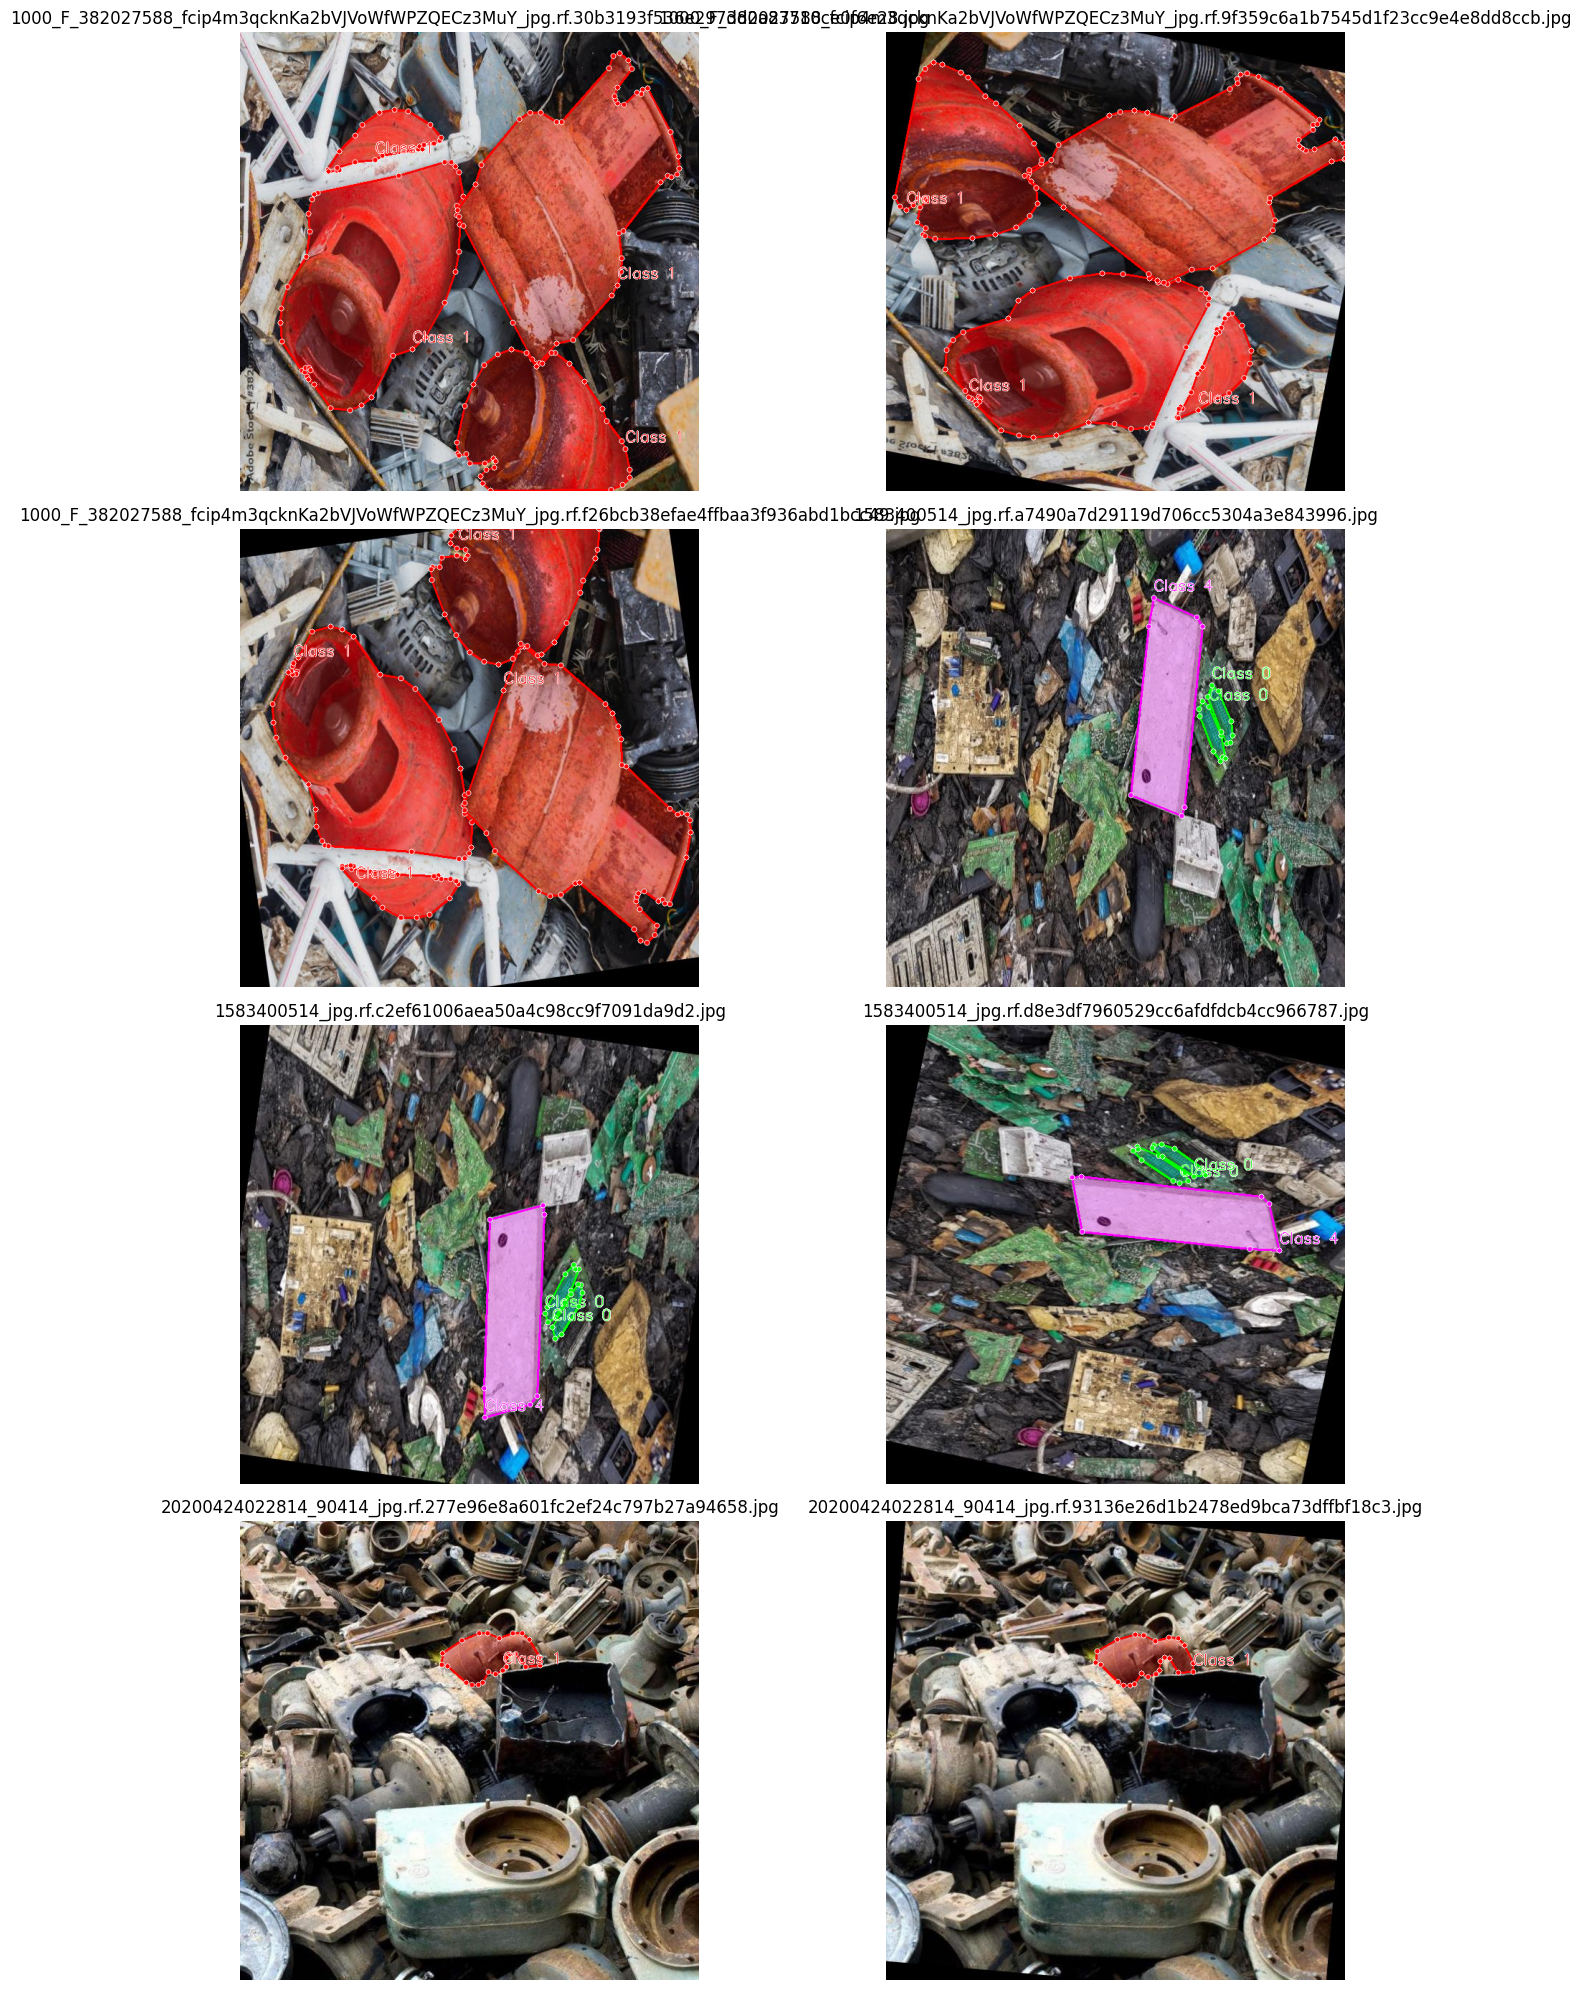

In [4]:
visualize_image_with_annotation_polygons_advanced(TRAIN_IMAGES, TRAIN_LABELS, fill_polygons=True, show_vertices=True)

In [5]:
image_files = sorted(os.listdir(TRAIN_IMAGES))

In [6]:
for image_file in image_files: 
    print(torchvision.io.read_image(TRAIN_IMAGES+"/"+image_file).shape)

torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([

In [7]:
import torch 
import os 
import random 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image 
import torchvision
from data import get_data


In [8]:
# Visualization helper function (optional)
def visualize_polygon_to_bbox_conversion(dataset, idx):
    """
    Helper function to visualize how polygons are converted to bounding boxes
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    image, target = dataset[idx]
    
    # Convert tensor image back to PIL for visualization
    if isinstance(image, torch.Tensor):
        image_np = image.permute(1, 2, 0).numpy()
        if image_np.max() <= 1.0:
            image_np = (image_np * 255).astype(np.uint8)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image_np)
    
    # Draw bounding boxes
    for i, box in enumerate(target['boxes']):
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        
        rect = patches.Rectangle((x_min, y_min), width, height, 
                               linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Add label
        label = target['labels'][i].item() - 1  # Convert back to original class id
        ax.text(x_min, y_min - 5, f'Class {label}', color='red', fontsize=12, weight='bold')
    
    ax.set_title(f'Polygon to Bounding Box Conversion - Image {idx}')
    plt.axis('off')
    plt.show()

In [9]:
TRAIN_IMAGES = "/home/anukul/Thesis_Data/Steel_Scrap_detection/train/images"
TRAIN_LABELS = "/home/anukul/Thesis_Data/Steel_Scrap_detection/train/labels"
VAL_IMAGES = "/home/anukul/Thesis_Data/Steel_Scrap_detection/valid/images"
VAL_LABELS = "/home/anukul/Thesis_Data/Steel_Scrap_detection/valid/labels"

train_dataset, val_dataset, _, _ = get_data(TRAIN_IMAGES, TRAIN_LABELS, VAL_IMAGES, VAL_LABELS)

print(train_dataset[0])
print(val_dataset[0])

(tensor([[[0.9647, 0.8549, 0.9373,  ..., 0.7843, 0.8118, 0.7882],
         [0.8510, 0.9608, 0.9137,  ..., 0.6549, 0.7333, 0.7725],
         [0.7020, 1.0000, 0.8902,  ..., 0.6706, 0.6863, 0.7059],
         ...,
         [0.4118, 0.3255, 0.2627,  ..., 0.8039, 0.7804, 0.8000],
         [0.4706, 0.3843, 0.3020,  ..., 0.8000, 0.7804, 0.8000],
         [0.4392, 0.4078, 0.3412,  ..., 0.7961, 0.7804, 0.7961]],

        [[0.8549, 0.7725, 0.8863,  ..., 0.7216, 0.7333, 0.7137],
         [0.7333, 0.8706, 0.8627,  ..., 0.5882, 0.6627, 0.7020],
         [0.5765, 0.8941, 0.8235,  ..., 0.6118, 0.6314, 0.6392],
         ...,
         [0.4118, 0.3255, 0.2745,  ..., 0.6431, 0.6196, 0.6392],
         [0.4706, 0.3843, 0.3137,  ..., 0.6392, 0.6196, 0.6392],
         [0.4392, 0.4078, 0.3529,  ..., 0.6353, 0.6196, 0.6353]],

        [[0.9020, 0.8078, 0.9137,  ..., 0.6706, 0.6902, 0.6588],
         [0.7804, 0.9098, 0.8902,  ..., 0.5490, 0.6157, 0.6549],
         [0.6275, 0.9412, 0.8549,  ..., 0.5843, 0.5961, 0

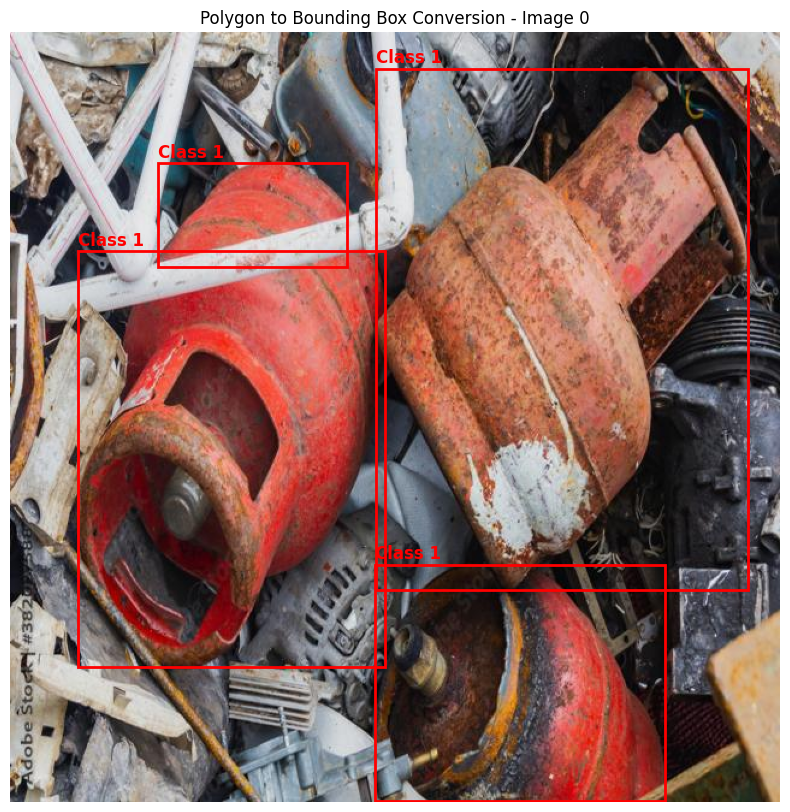

In [10]:
visualize_polygon_to_bbox_conversion(train_dataset, 0)